# MAGPHYS results for *almost* full sample...

Still To Do:
* galactic extinction correction 
* internal extinction correction?
* address galaxies that fail when calculating total flux


In [65]:
import os
import numpy as np
homedir = os.getenv("HOME")

import warnings
warnings.filterwarnings('ignore')

In [39]:
def plotone(vfid):
    topdir = os.getcwd()
    %run ~/github/virgoseds/python/sedFunctions.py

    os.chdir(vfid)

    wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
    s = magphys_sed(vfid,wavelengths)
    s.plot_sed()
    s.plot_histograms()
    os.chdir(topdir)

In [2]:
os.chdir(homedir+'/research/Virgo/magphys/magphysParallelGrawp/output')

In [3]:
os.system('rsync -av --exclude *.lbr grawp:research/Virgo/magphysParallel/output/* . ')

0

In [6]:
%run ~/github/virgoseds/python/gatherMagphys.py

max directory =  6779
number processed =  6173


# Update readtablesv2 and read in tables

Update ~/github/Virgo/programs/readtablesv2.py to read the latest magphys table.

In [7]:

%run ~/github/Virgo/programs/readtablesv2.py

# SFR vs Mstar


* we still see the striping, especially at lower masses and SFRs
* the overall values are in good agreement with z0MGS values

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of southern sources = 3281


[5.0, 12, -8, 2.5]

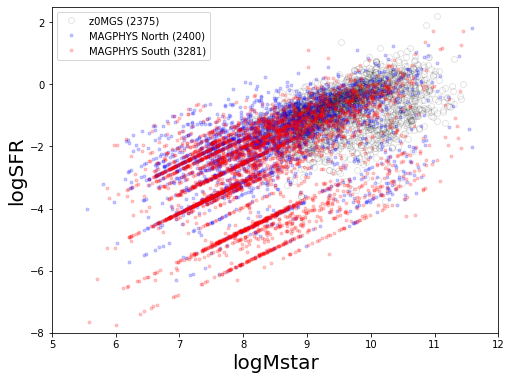

In [335]:
flag = (v.magphys['logMstar'] > 0) 
plt.figure(figsize=(8,6))

# overplot z0MGS
zflag = (v.z0mgs['logmass'] > 0) 
plt.plot(v.z0mgs['logmass'][zflag],v.z0mgs['logsfr'][zflag],'ko',mfc='None',alpha=.1,label=f'z0MGS ({np.sum(zflag)})')


Nflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] >= 32.375)
plt.plot(v.magphys['logMstar'][Nflag],v.magphys['logSFR'][Nflag],'b.',alpha=.2,label=f'MAGPHYS North ({np.sum(Nflag)})')


Sflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] < 32.375)
print(f"number of southern sources = {np.sum(Sflag)}")
plt.plot(v.magphys['logMstar'][Sflag],v.magphys['logSFR'][Sflag],'r.',alpha=.2,label=f'MAGPHYS South ({np.sum(Sflag)})')

plt.xlabel('logMstar',fontsize=20)

plt.ylabel('logSFR',fontsize=20)
plt.legend()
plt.axis([5.,12,-8,2.5])

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


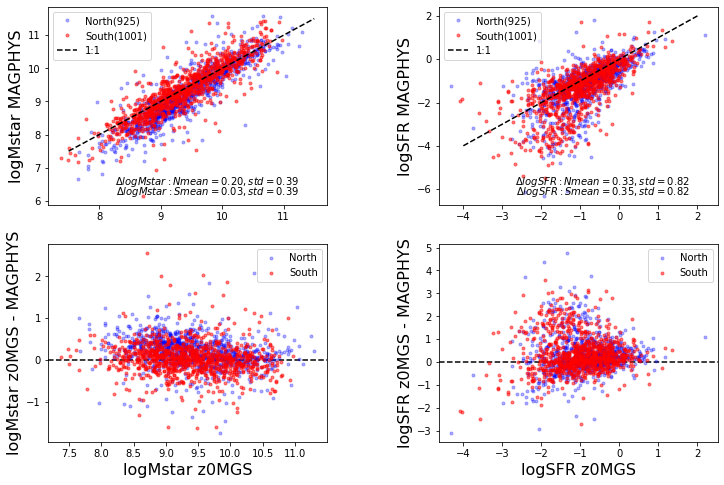

In [336]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend()

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend()


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


logMstar: rms = 0.40


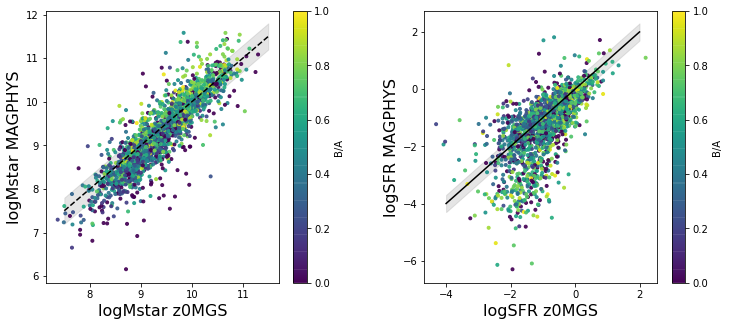

In [330]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=.3)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(1,2,1)

xline=np.linspace(7.5,11.5,50)
plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='0.5',alpha=.2)
plt.scatter(v.z0mgs['logmass'][flag],v.magphys['logMstar'][flag],c=v.nsav0['SERSIC_BA'][flag],marker='.',alpha=.9)

rms = np.std(v.z0mgs['logmass'][flag]-v.magphys['logMstar'][flag])
print("logMstar: rms = {:.2f}".format(rms))
plt.colorbar(label='B/A')

plt.subplot(1,2,2)
#plt.plot(v.z0mgs['logsfr'][flag],v.magphys['logSFR'][flag],'k.',alpha=.3)

xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k-',label='1:1')
plt.fill_between(xline,xline+.3,xline-.3,color='0.5',alpha=.2)
plt.scatter(v.z0mgs['logsfr'][flag],v.magphys['logSFR'][flag],c=v.nsav0['SERSIC_BA'][flag],marker='.',alpha=.9)

plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
plt.colorbar(label='B/A')


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of matched =  1724


Text(0.95, 0.1, 'logMstar Taylor - MAGPHYS: mean=-0.12+/-0.40')

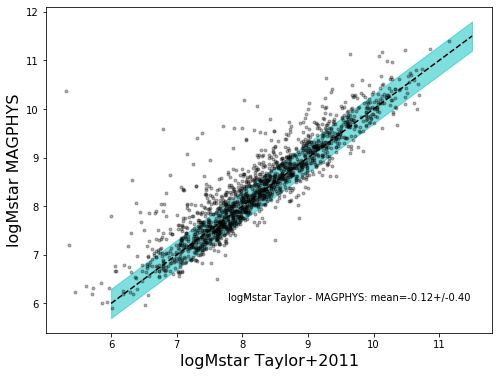

In [333]:
# compare with Taylor stellar mass

plt.figure(figsize=(8,6))
flag = (v.magphys['logMstar'] > 0) & (v.a100['logMstarTaylor'] > 0) 

plt.plot(v.a100['logMstarTaylor'][flag],v.magphys['logMstar'][flag],'k.',alpha=.3)
xline=np.linspace(6,11.5,50)
plt.plot(xline,xline,'k--')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar Taylor+2011',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='c',alpha=.5)

print('number of matched = ',np.sum(flag))
rms = np.std(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
mean = np.mean(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
plt.text(0.95,0.1,"logMstar Taylor - MAGPHYS: mean={:.2f}+/-{:.2f}".format(mean,rms),transform=plt.gca().transAxes,horizontalalignment='right')


0309


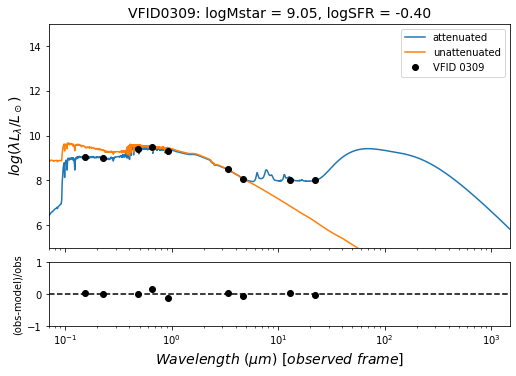

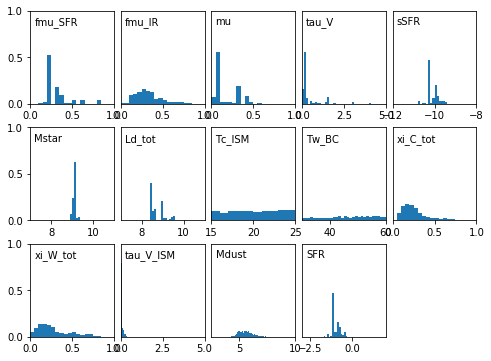

In [34]:
vfid = v.main['VFID'][v.main['VFID_V1']=='VFID0309'][0].replace('VFID','')
print(vfid)
plotone(vfid)

0386


/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: divide by zero encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: divide by zero encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: divide by zero encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:239: RuntimeWarning: divide by zero encountered in true_divide
  resid = (10.**L_flux - 10.**L_pflux)/10.**L_flux
/home/rfinn/github/virgoseds/python/s

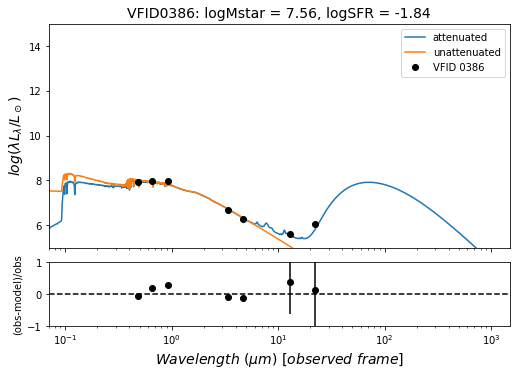

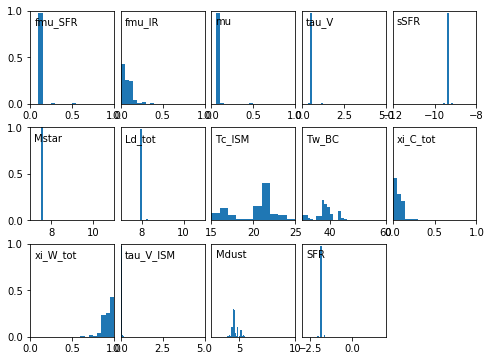

In [35]:
vfid = v.main['VFID'][v.main['VFID_V1']=='VFID0386'][0].replace('VFID','')
print(vfid)
plotone(vfid)

0473
0483
0531


/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: invalid value encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: invalid value encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)


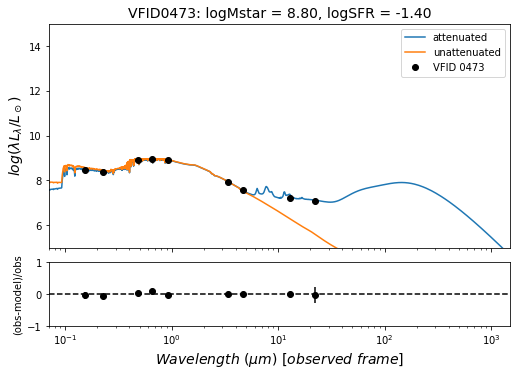

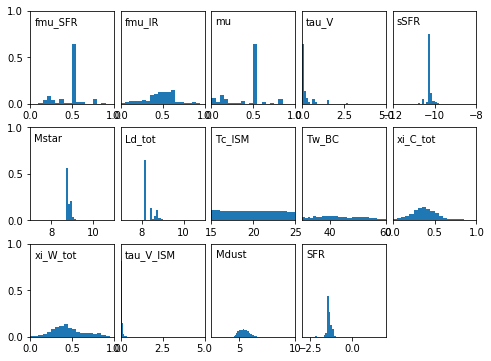

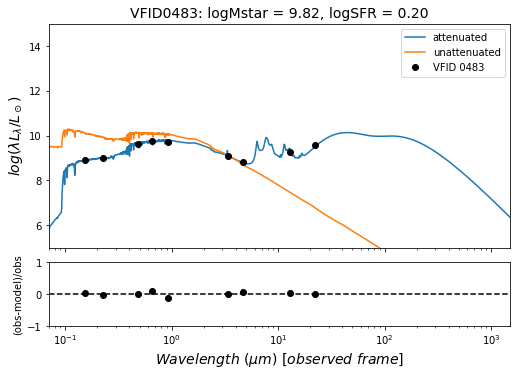

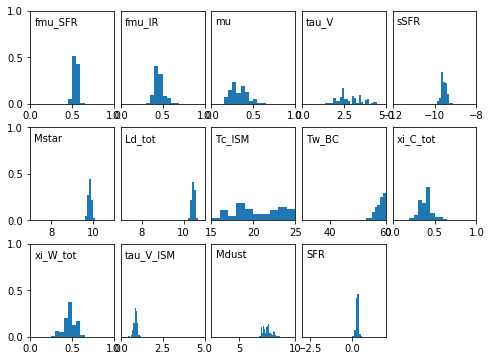

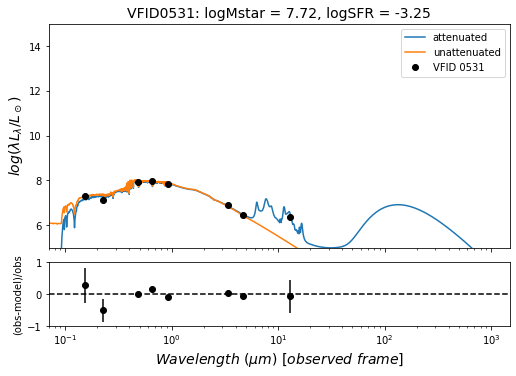

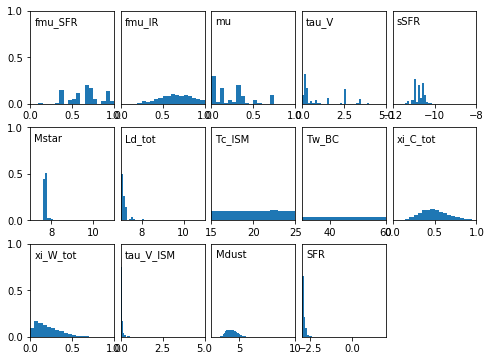

In [45]:
v1vfids = ["0473","0483","0531"]
for vf in v1vfids:
    vfid = v.main['VFID'][v.main['VFID_V1']==f'VFID{vf}'][0].replace('VFID','')
    print(vfid)
    plotone(vfid)

# AFTER EXTINCTION CORRECTION

In [355]:
%run ~/github/virgoseds/python/gatherMagphys.py
%run ~/github/Virgo/programs/readtablesv2.py

max directory =  6779
number processed =  5668


/home/rfinn/github/Virgo/programs/readtablesv2.py:129: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:129: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:130: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:130: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:131: RuntimeWarning: divide by zero encountered in log10
  d_pc = self.env['Vcosmic']/H0*1.e6
/home/rfinn/github/Virgo/programs/readtablesv2.py:131: RuntimeWarning: invalid value encountered in log10
  d_pc = self.env['Vcosmic']/H0*1.e6
/home/rfinn/github/Virgo/programs/readtablesv2.py:133: RuntimeWarning: invalid value encountered in log10
  MG = g - const


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of southern sources = 3369


[5.0, 12, -8, 2.5]

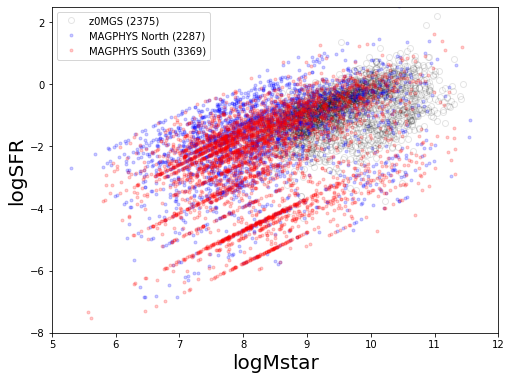

In [356]:
flag = (v.magphys['logMstar'] > 0) 
plt.figure(figsize=(8,6))

# overplot z0MGS
zflag = (v.z0mgs['logmass'] > 0) 
plt.plot(v.z0mgs['logmass'][zflag],v.z0mgs['logsfr'][zflag],'ko',mfc='None',alpha=.1,label=f'z0MGS ({np.sum(zflag)})')


Nflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] >= 32.375)
plt.plot(v.magphys['logMstar'][Nflag],v.magphys['logSFR'][Nflag],'b.',alpha=.2,label=f'MAGPHYS North ({np.sum(Nflag)})')


Sflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] < 32.375)
print(f"number of southern sources = {np.sum(Sflag)}")
plt.plot(v.magphys['logMstar'][Sflag],v.magphys['logSFR'][Sflag],'r.',alpha=.2,label=f'MAGPHYS South ({np.sum(Sflag)})')

plt.xlabel('logMstar',fontsize=20)

plt.ylabel('logSFR',fontsize=20)
plt.legend()
plt.axis([5.,12,-8,2.5])

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


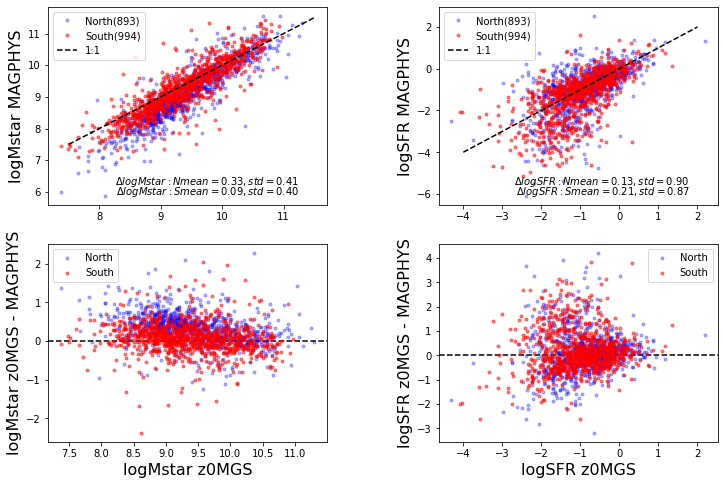

In [357]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of matched =  1701


Text(0.95, 0.1, 'logMstar Taylor - MAGPHYS: mean=-0.11+/-0.42')

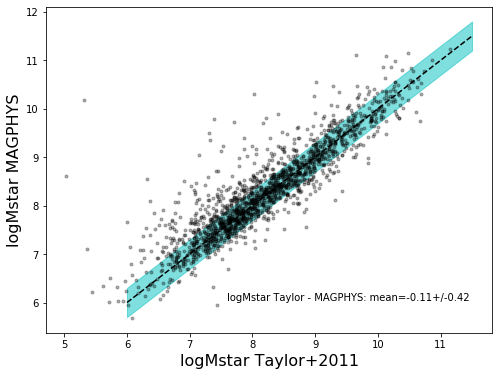

In [358]:
# compare with Taylor stellar mass

plt.figure(figsize=(8,6))
flag = (v.magphys['logMstar'] > 0) & (v.a100['logMstarTaylor'] > 0) 

plt.plot(v.a100['logMstarTaylor'][flag],v.magphys['logMstar'][flag],'k.',alpha=.3)
xline=np.linspace(6,11.5,50)
plt.plot(xline,xline,'k--')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar Taylor+2011',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='c',alpha=.5)

print('number of matched = ',np.sum(flag))
rms = np.std(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
mean = np.mean(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
plt.text(0.95,0.1,"logMstar Taylor - MAGPHYS: mean={:.2f}+/-{:.2f}".format(mean,rms),transform=plt.gca().transAxes,horizontalalignment='right')


## Compare Mstar and SFR before and after extinction correction

In [344]:
noext = Table.read('/home/rfinn/research/Virgo/tables-north/v2/magphys/vf_v2_magphys_03-Jun-2022.fits')

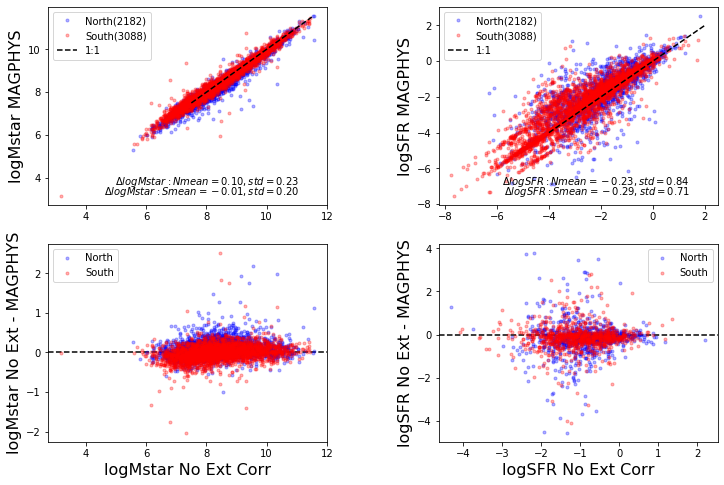

In [364]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (noext['logMstar'] > 0)
plt.subplot(2,2,1)
plt.plot(noext['logMstar'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(noext['logMstar'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.3,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(noext['logMstar'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(noext['logMstar'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(noext['logMstar'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(noext['logMstar'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend()

###### RESIDUALS

Ndelta = noext['logMstar'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = noext['logMstar'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(noext['logMstar'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(noext['logMstar'][flag & Sflag],Sdelta,'r.',alpha=.3,label='South')

plt.xlabel('logMstar No Ext Corr',fontsize=16)
plt.ylabel('logMstar No Ext - MAGPHYS',fontsize=16)
                                      

plt.legend()


####### SFRS


plt.subplot(2,2,2)
                                      
x = noext['logSFR']
y = v.magphys['logSFR']
plt.plot(x[flag & Nflag],y[flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(x[flag & Sflag],y[flag & Sflag],'r.',alpha=.3,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = x-y
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.3,label="South")
plt.xlabel('logSFR No Ext Corr',fontsize=16)
plt.ylabel('logSFR No Ext - MAGPHYS',fontsize=16)
plt.legend()

0473
0483
0531


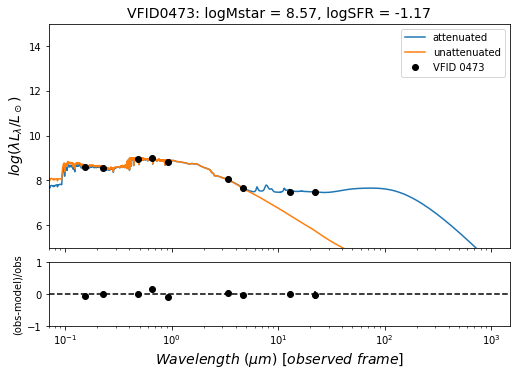

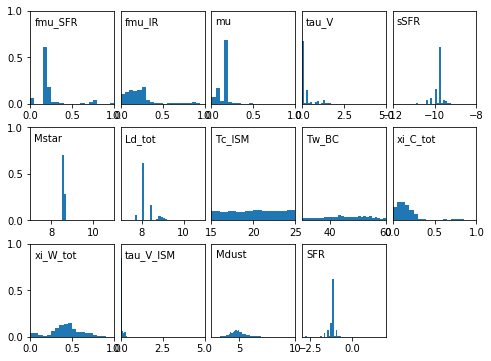

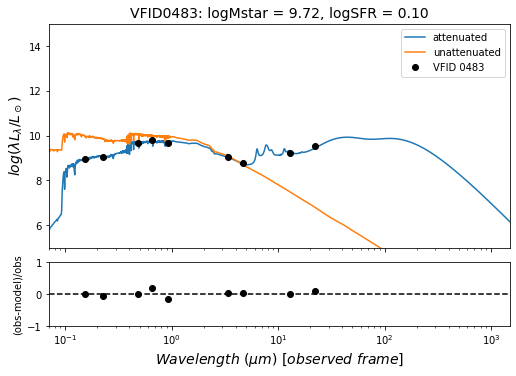

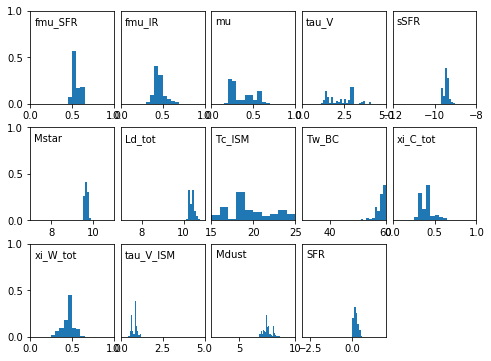

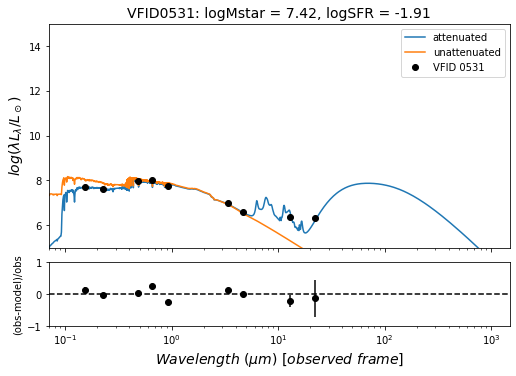

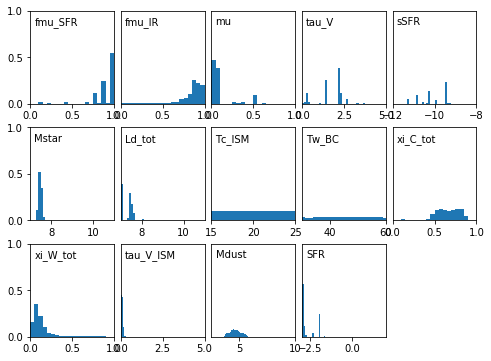

In [347]:
v1vfids = ["0473","0483","0531"]
for vf in v1vfids:
    vfid = v.main['VFID'][v.main['VFID_V1']==f'VFID{vf}'][0].replace('VFID','')
    print(vfid)
    plotone(vfid)

# Running Without z-band Data


In [ ]:
%run ~/github/virgoseds/python/gatherMagphys.py --magdir /home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output --plot

In [ ]:
python ~/github/virgoseds/python/gatherMagphys.py --magdir /home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output-nozband --plot 


# Read in results

In [13]:
%run ~/github/Virgo/programs/readtablesv2.py
Nflag = (v.main['DEC'] >= 32.375)
Sflag = (v.main['DEC'] < 32.375)

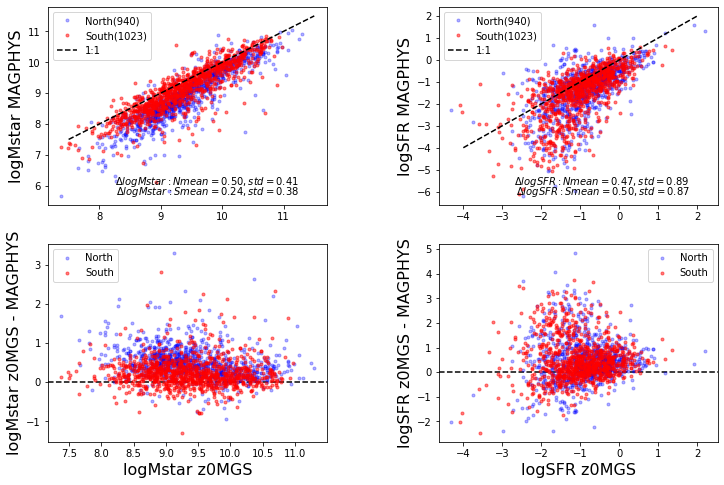

In [14]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


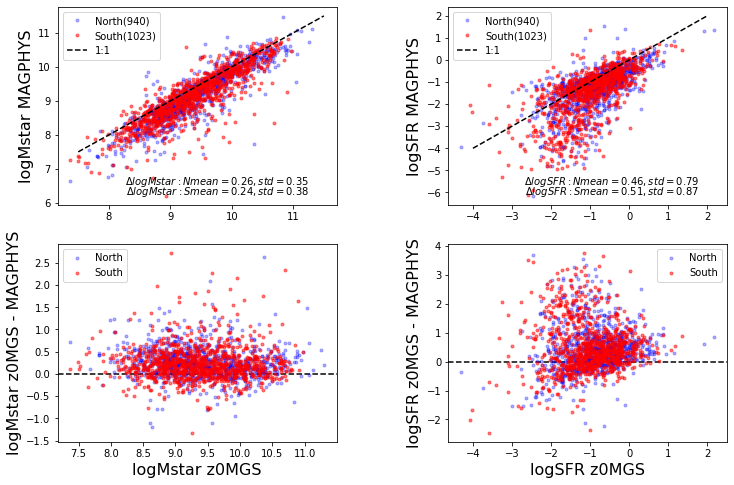

In [15]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys_noz['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys_noz['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys_noz['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys_noz['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys_noz['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys_noz['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys_noz['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys_noz['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys_noz['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys_noz['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys_noz['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys_noz['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


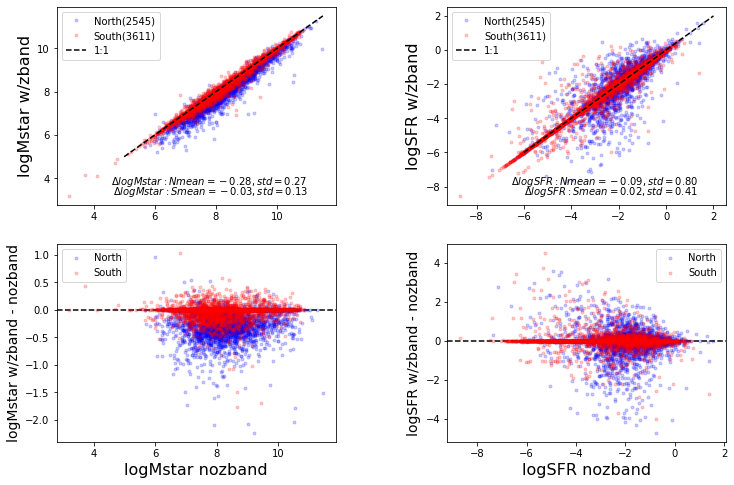

In [38]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys_noz['logMstar'] > 0) & (v.magphys['logMstar'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.magphys_noz['logMstar'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.2,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.magphys_noz['logMstar'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.2,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

deltam = v.magphys['logMstar']-v.magphys_noz['logMstar']
Nmean = np.mean(deltam[flag & Nflag])
Nrms = np.std(deltam[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(deltam[flag & Sflag])
Srms = np.std(deltam[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar magphys',fontsize=16)
plt.ylabel('logMstar w/zband',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = deltam[flag & Nflag]
Sdelta = deltam[flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.magphys_noz['logMstar'][flag & Nflag],Ndelta,'b.',alpha=.2,label='North')
plt.plot(v.magphys_noz['logMstar'][flag & Sflag],Sdelta,'r.',alpha=.2,label='South')

plt.xlabel('logMstar nozband',fontsize=16)
plt.ylabel('logMstar w/zband - nozband',fontsize=14)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.magphys_noz['logSFR'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.2,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.magphys_noz['logSFR'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.2,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-6,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.magphys['logSFR']-v.magphys_noz['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR magphys',fontsize=16)
plt.ylabel('logSFR w/zband',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.magphys_noz['logSFR'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.2,label="North")
plt.plot(v.magphys_noz['logSFR'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.2,label="South")
plt.xlabel('logSFR nozband',fontsize=16)
plt.ylabel('logSFR w/zband - nozband',fontsize=14)
plt.legend()

### Striping still in main sequence?

ANSWER = yes

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of southern sources = 3611


[5.0, 12, -8, 2.5]

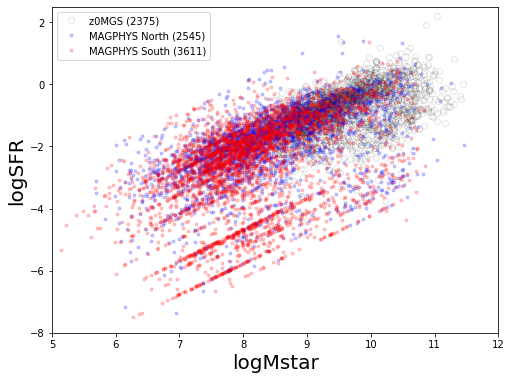

In [30]:
flag = (v.magphys_noz['logMstar'] > 0) 
plt.figure(figsize=(8,6))

# overplot z0MGS
zflag = (v.z0mgs['logmass'] > 0) 
plt.plot(v.z0mgs['logmass'][zflag],v.z0mgs['logsfr'][zflag],'ko',mfc='None',alpha=.1,label=f'z0MGS ({np.sum(zflag)})')


Nflag = (v.magphys_noz['logMstar'] > 0) & (v.main['DEC'] >= 32.375)
plt.plot(v.magphys_noz['logMstar'][Nflag],v.magphys_noz['logSFR'][Nflag],'b.',alpha=.2,label=f'MAGPHYS North ({np.sum(Nflag)})')


Sflag = (v.magphys_noz['logMstar'] > 0) & (v.main['DEC'] < 32.375)
print(f"number of southern sources = {np.sum(Sflag)}")
plt.plot(v.magphys_noz['logMstar'][Sflag],v.magphys_noz['logSFR'][Sflag],'r.',alpha=.2,label=f'MAGPHYS South ({np.sum(Sflag)})')

plt.xlabel('logMstar',fontsize=20)

plt.ylabel('logSFR',fontsize=20)
plt.legend()
plt.axis([5.,12,-8,2.5])

In [40]:
os.chdir('/home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output-nozband/')

/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: divide by zero encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: invalid value encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: divide by zero encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: divide by zero encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/s

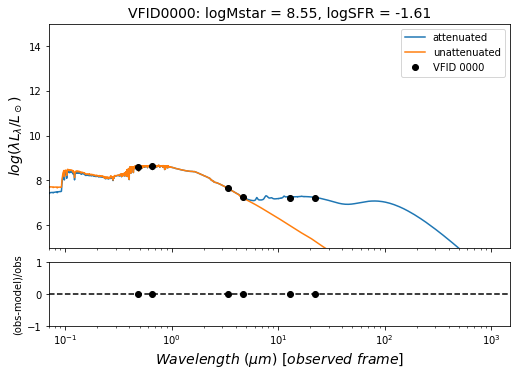

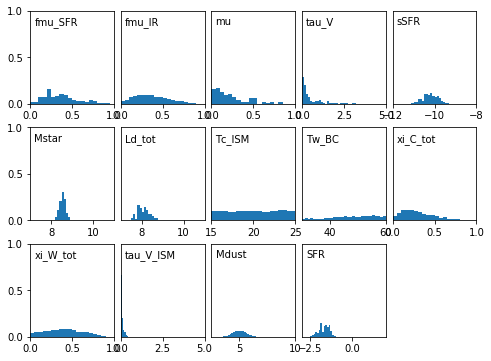

In [42]:
plotone('0000')

In [72]:
def testplot(vfid):
    topdir = os.getcwd()
    %run ~/github/virgoseds/python/sedFunctions.py

    os.chdir(vfid)

    wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
    s = magphys_sed(vfid,wavelengths)
    s.plot_sed_pdfs()
    
    os.chdir(topdir)

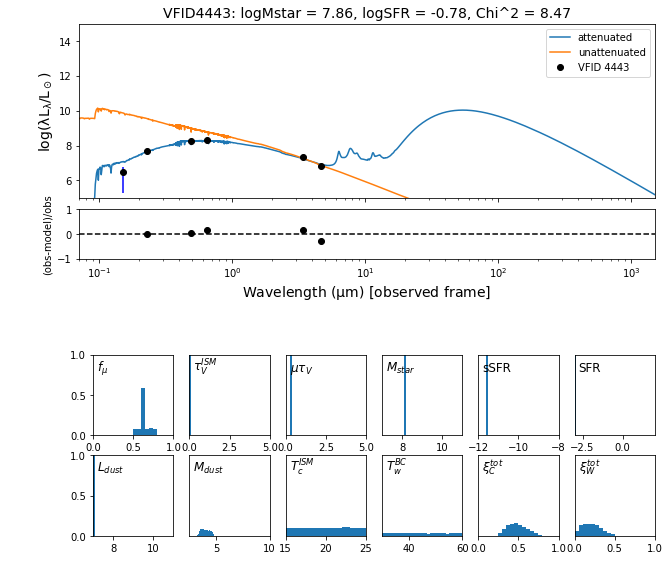

In [73]:
os.chdir('/home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output-nozband/')
testplot('4443')

# Updates Jan 2024


* remake plots using July 2023 run, which uses JM's latest photometry catalogs
* compare with and w/out extinction correction
* make sure we are using z band

* we use fluxes from AP06 - need to convert to total mass, or atleast compare AP06 vs total mag

In [1]:
import os
from matplotlib import pyplot as plt

In [4]:
# move to plots directories
homedir = os.getenv("HOME")
os.chdir(os.path.join(homedir,'research/Virgo/magphys/plots/'))

In [3]:
%run ~/github/Virgo/programs/readtablesv2.py
Nflag = (v.main['DEC'] >= 32.375)
Sflag = (v.main['DEC'] < 32.375)

## Comparing with z0MGS Mstar and SFR

In [9]:

def compare2z0mgs(mptab,mlabel="magphys"):
    """pass in magphys table to use when comparing to z0mgs"""
    plt.figure(figsize=(12,8))
    plt.subplots_adjust(wspace=.4)

    flag = (mptab['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
    plt.subplot(2,2,1)
    plt.plot(v.z0mgs['logmass'][flag & Nflag],mptab['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(v.z0mgs['logmass'][flag & Sflag],mptab['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(7.5,11.5,50)

    plt.plot(xline,xline,'k--',label='1:1')
    #plt.axis([7.5,11.5,7.5,11.5])

    Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-mptab['logMstar'][flag & Nflag])
    Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-mptab['logMstar'][flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



    Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-mptab['logMstar'][flag & Sflag])
    Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-mptab['logMstar'][flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


    #plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar MAGPHYS',fontsize=16)
    plt.legend(loc='upper left')

    ###### RESIDUALS

    Ndelta = v.z0mgs['logmass'][flag & Nflag]-mptab['logMstar'][flag & Nflag]
    Sdelta = v.z0mgs['logmass'][flag & Sflag]-mptab['logMstar'][flag & Sflag]

    plt.subplot(2,2,3)
    plt.axhline(y=0,ls='--',c='k')
    plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
    plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

    plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

    plt.legend(loc='upper left')


    ####### SFRS


    plt.subplot(2,2,2)
    plt.plot(v.z0mgs['logsfr'][flag & Nflag],mptab['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(v.z0mgs['logsfr'][flag & Sflag],mptab['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(-4,2,50)
    plt.plot(xline,xline,'k--',label='1:1')

    delta = v.z0mgs['logsfr']-mptab['logSFR']
    Nmean = np.mean(delta[flag & Nflag])
    Nrms = np.std(delta[flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


    Smean = np.mean(delta[flag & Sflag])
    Srms = np.std(delta[flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

    #plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR MAGPHYS',fontsize=16)
    #plt.axis([-3,2.5,-3,2.5])
    plt.legend(loc='upper left')

    ###### RESIDUALS
    plt.subplot(2,2,4)
    plt.axhline(y=0,ls='--',color='k')
    plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
    plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
    plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
    plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


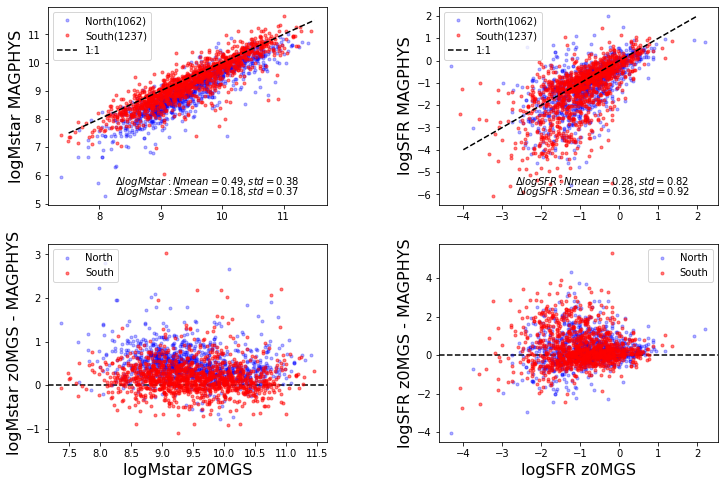

In [10]:
mptab = v.magphys
compare2z0mgs(mptab)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


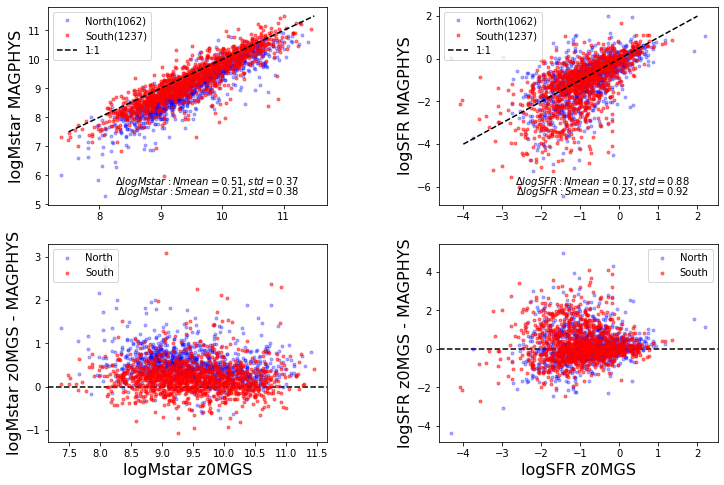

In [11]:
mptab = v.magphys_lext
compare2z0mgs(mptab)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


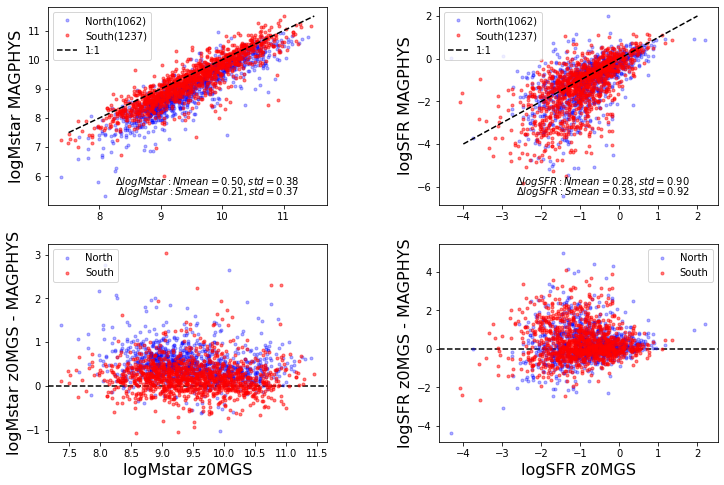

In [12]:
mptab = v.magphys_sext
compare2z0mgs(mptab)

## Comparing magphys with and w/out extinction corrections


#### Summary

* The stellar mass estimates do not seem to be affected by the extinction correction.  That seems odd...
* SFRs are not strongly affected - this also seems odd...  
* The SFRs increase by 
    * ~ 0.12 dex when using the Legacy Extinction
    * neglible amount when using the Salim Extinction

In [15]:
def compare2magphys(mptab1,mptab2,mlabel1="magphys",mlabel2="magphys_legext"):
    """pass in magphys table to use when comparing to z0mgs"""
    masskey = 'logMstar-med'
    masskey = 'logSFR-med'
    plt.figure(figsize=(12,8))
    plt.subplots_adjust(wspace=.4)

    flag = (mptab1[masskey] > 0) & (mptab2[masskey] > 0) 
    plt.subplot(2,2,1)
    plt.plot(mptab1[masskey][flag & Nflag],mptab2[masskey][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(mptab1[masskey][flag & Sflag],mptab2[masskey][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(7.5,11.5,50)

    plt.plot(xline,xline,'k--',label='1:1')
    #plt.axis([7.5,11.5,7.5,11.5])

    Nmean = np.mean(mptab1[masskey][flag & Nflag]-mptab2[masskey][flag & Nflag])
    Nrms = np.std(mptab1[masskey][flag & Nflag]-mptab2[masskey][flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



    Smean = np.mean(mptab1[masskey][flag & Sflag]-mptab2[masskey][flag & Sflag])
    Srms = np.std(mptab1[masskey][flag & Sflag]-mptab2[masskey][flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


    #plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar '+mlabel2,fontsize=16)
    plt.legend(loc='upper left')

    ###### RESIDUALS

    Ndelta = mptab1[masskey][flag & Nflag]-mptab[masskey][flag & Nflag]
    Sdelta = mptab1[masskey][flag & Sflag]-mptab[masskey][flag & Sflag]

    plt.subplot(2,2,3)
    plt.axhline(y=0,ls='--',c='k')
    plt.plot(mptab1[masskey][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
    plt.plot(mptab1[masskey][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

    plt.xlabel('logMstar '+mlabel1,fontsize=16)
    plt.ylabel(mlabel1+' - '+mlabel2,fontsize=16)

    plt.legend(loc='upper left')


    ####### SFRS


    plt.subplot(2,2,2)
    plt.plot(mptab1['logSFR'][flag & Nflag],mptab2['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(mptab1['logSFR'][flag & Sflag],mptab2['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(-4,2,50)
    plt.plot(xline,xline,'k--',label='1:1')

    delta = mptab1['logSFR']-mptab2['logSFR']
    Nmean = np.mean(delta[flag & Nflag])
    Nrms = np.std(delta[flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


    Smean = np.mean(delta[flag & Sflag])
    Srms = np.std(delta[flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

    #plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR '+mlabel2,fontsize=16)
    #plt.axis([-3,2.5,-3,2.5])
    plt.legend(loc='upper left')

    ###### RESIDUALS
    plt.subplot(2,2,4)
    plt.axhline(y=0,ls='--',color='k')
    plt.plot(mptab1['logSFR'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
    plt.plot(mptab1['logSFR'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
    plt.xlabel('logSFR '+mlabel1,fontsize=16)
    plt.ylabel('logSFR '+mlabel1+'-'+mlabel2,fontsize=16)
    plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


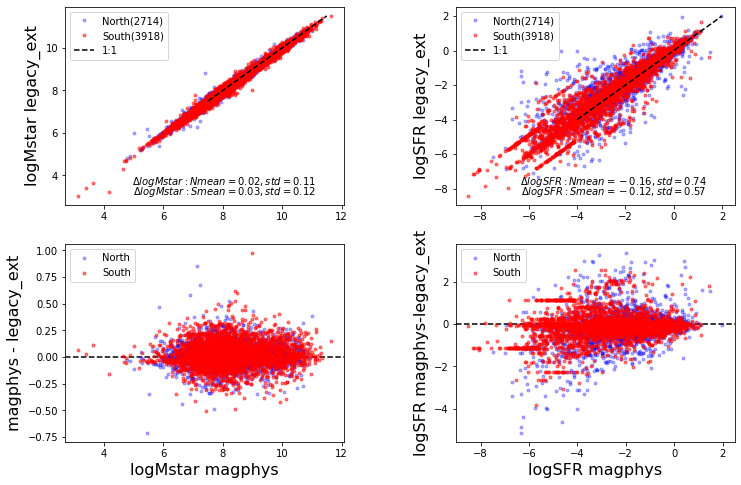

In [19]:
mptab1 = v.magphys
mptab2 = v.magphys_lext
compare2magphys(mptab1,mptab2,mlabel2='legacy_ext')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


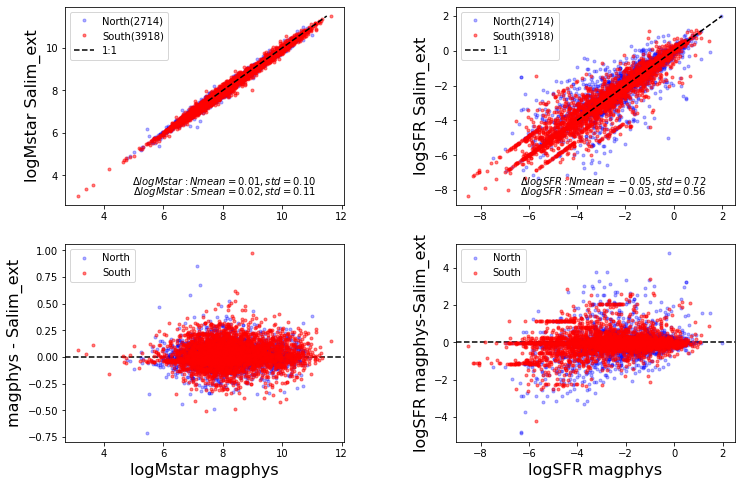

In [18]:
mptab1 = v.magphys
mptab2 = v.magphys_sext
compare2magphys(mptab1,mptab2,mlabel2='Salim_ext')

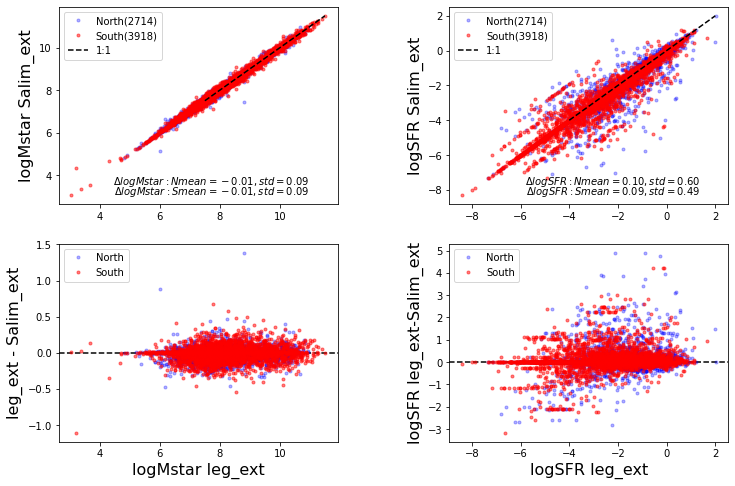

In [89]:
mptab1 = v.magphys_lext
mptab2 = v.magphys_sext
compare2magphys(mptab1,mptab2,mlabel1='leg_ext',mlabel2='Salim_ext')

# Comparing fluxes

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def plotapflux(table,index):
    bands = ['G','R','Z','W1','W2','W3','W4','NUV']#,'FUV']
    flux = []
    flux_err = []
    rad_grz = np.array([0.5, 0.75, 1.0, 1.5, 2.0, 3.5, 5.0, 7.0],'f')#arcsec
    rad_wise = rad_grz[3:]
    for b in bands:
        flux_key = 'APFLUX_'+b
        ivar_key = 'FLUX_IVAR_'+b
        flux = table[flux_key][index]
        flux_err = 1./np.sqrt(table[ivar_key][index])

        if (b.startswith('W') or b.startswith('NUV')):
            aps = rad_wise
        else:
            aps = rad_grz
        #print(len(flux),len(aps))
        #aps = aps*table[fwhm_key][i]
        plt.errorbar(aps,flux,yerr=flux_err,label=b,fmt='o-')
        plt.xlabel('Radius (arcsec)',fontsize=15)
        plt.ylabel('Flux (nmgy)',fontsize=15)
        

In [22]:
v.ephot.colnames

['VFID',
 'photFlag',
 'SGA_ID',
 'VF_ID',
 'GALAXY',
 'X0_MOMENT',
 'Y0_MOMENT',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'PA_MOMENT',
 'BA_MOMENT',
 'SMA_FUV',
 'INTENS_FUV',
 'INTENS_ERR_FUV',
 'EPS_FUV',
 'EPS_ERR_FUV',
 'PA_FUV',
 'PA_ERR_FUV',
 'X0_FUV',
 'X0_ERR_FUV',
 'Y0_FUV',
 'Y0_ERR_FUV',
 'A3_FUV',
 'A3_ERR_FUV',
 'A4_FUV',
 'A4_ERR_FUV',
 'RMS_FUV',
 'PIX_STDDEV_FUV',
 'STOP_CODE_FUV',
 'NDATA_FUV',
 'NFLAG_FUV',
 'NITER_FUV',
 'SMA_NUV',
 'INTENS_NUV',
 'INTENS_ERR_NUV',
 'EPS_NUV',
 'EPS_ERR_NUV',
 'PA_NUV',
 'PA_ERR_NUV',
 'X0_NUV',
 'X0_ERR_NUV',
 'Y0_NUV',
 'Y0_ERR_NUV',
 'A3_NUV',
 'A3_ERR_NUV',
 'A4_NUV',
 'A4_ERR_NUV',
 'RMS_NUV',
 'PIX_STDDEV_NUV',
 'STOP_CODE_NUV',
 'NDATA_NUV',
 'NFLAG_NUV',
 'NITER_NUV',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'SMA_IVAR_SB22',
 'SMA_IVAR_SB22.5',
 'SMA_IVAR_SB23',
 'SMA_IVAR_SB23.5',
 'SMA_IVAR_SB24',
 'SMA_IVAR_SB24.5',
 'SMA_IVAR_SB25',

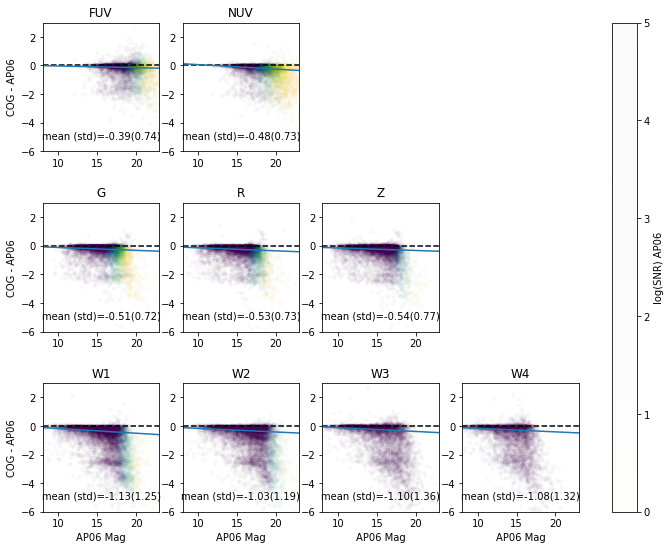

In [99]:
# plot COG vs AP06
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.4)
bands = ['FUV','NUV','G','R','Z','W1','W2','W3','W4']#,]
iplot = {'FUV':1,'NUV':2,'G':5,'R':6,'Z':7,'W1':9,'W2':10,'W3':11,'W4':12}
allax = []
for i,b in enumerate(bands):
    plt.subplot(3,4,iplot[b])
    x_key = 'FLUX_AP06_'+b
    err_key = 'FLUX_IVAR_AP06_'+b
    snr = np.abs(v.ephot[x_key]/v.ephot[err_key])
    y_key = 'COG_MTOT_'+b
    c_key = 'FRACMASKED_AP06_'+b
    apmag = 22.5-2.5*np.log10(v.ephot[x_key])
    err = v.ephot[x_key]
    dmag = v.ephot[y_key]-apmag
    
    flag = (v.ephot[x_key] > 0) & (v.ephot[y_key] > 0) & (v.ephot[c_key] < 0.1)
    fitflag = flag & (np.abs(dmag) < 1)
    
    plt.scatter(apmag,dmag,c=np.log(snr),vmin=0,vmax=5,s=10,alpha=.02,cmap='viridis_r')
    plt.ylim(-6,3)
    xmin,xmax = 8,23
    plt.xlim(xmin,xmax)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,np.zeros(len(xline)),'k--',)#label='1:1')
    

    Nmean = np.nanmean(dmag[flag])
    Nrms = np.nanstd(dmag[flag])
    plt.text(0.5,0.1,"mean (std)={:.2f}({:.2f})".format(Nmean,Nrms),fontsize=10,transform=plt.gca().transAxes,horizontalalignment="center")
    
    # fit a line
    fitflag = flag & (np.abs(dmag) < 1)
    c = np.polyfit(apmag[fitflag],dmag[fitflag],1)#,w=v.ephot[err_key][fitflag])
    yfit = np.polyval(c,xline)
    plt.plot(xline,yfit)
    if (i == 0) | (i == 2)| (i == 5):
        plt.ylabel("COG - AP06")
    if i > 4:
        plt.xlabel("AP06 Mag")
    plt.title(b)
    allax.append(plt.gca())
plt.colorbar(ax=allax,label='log(SNR) AP06')

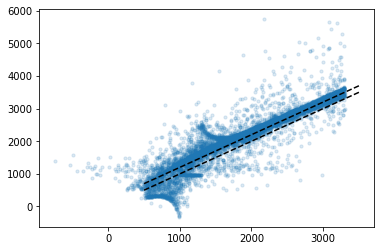

In [98]:
plt.figure()
plt.scatter(v.main['vr'],v.env['Vcosmic'],s=10,alpha=.15)
#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
xline = np.linspace(500,3500)
plt.plot(xline,xline,'k--')
plt.plot(xline,xline+200,'k--')